In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy.ndimage.filters import convolve

read image

In [2]:
snake = imread('control-arduino-python-670x335.jpg')

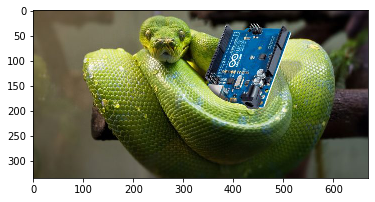

In [3]:
plt.imshow(snake)
plt.show()

In [4]:
red = snake[:, :, 0]
green = snake[:, :, 1]
blue = snake[:, :, 2]

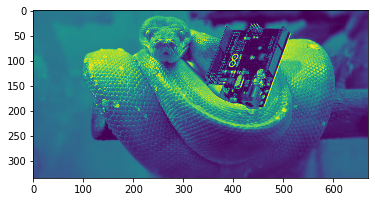

In [5]:
plt.imshow(red)

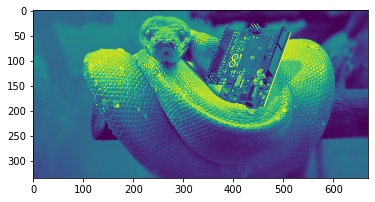

In [6]:
plt.imshow(green)

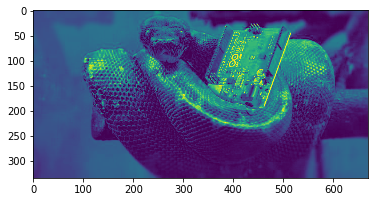

In [7]:
plt.imshow(blue)

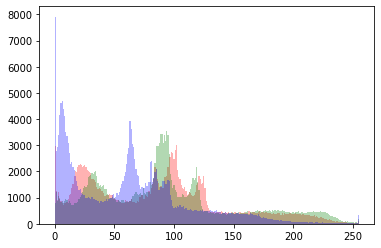

In [8]:
plt.hist(red.ravel(), bins=256, color='red', alpha=0.3)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.3)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.3)
plt.show()

In [9]:
snake_grayscale = np.mean(snake, axis=2)

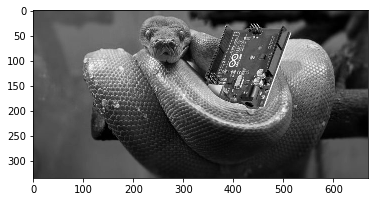

In [10]:
plt.imshow(snake_grayscale, cmap='gray')

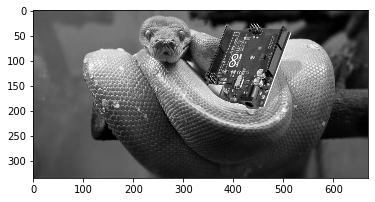

In [11]:
snake_grayscale = 0.299 * red + 0.587 * green + 0.114 * blue
plt.imshow(snake_grayscale, cmap='gray')

this is how humans see the colors
https://en.wikipedia.org/wiki/Color_vision#/media/File:Cone-fundamentals-with-srgb-spectrum.svg

Let's try som convolution kernel

In [12]:
def image_processing(image, kernel):
    
    blurred = convolve(image, kernel)
    plt.imshow(blurred[10:120, 200:330], cmap='gray')
    plt.show()

In [13]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

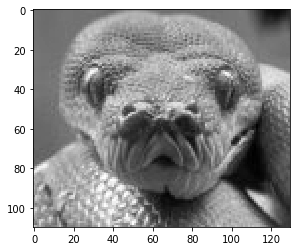

In [14]:
image_processing(snake_grayscale, identity_kernel)

Next one is not blurred

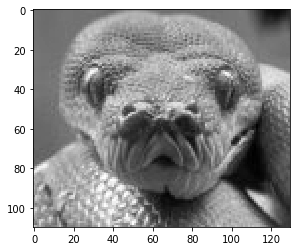

In [15]:
plt.imshow(snake_grayscale[10:120, 200:330], cmap='gray')
plt.show()

detect edges by diagonals 

In [16]:
edge_deteltion_kernel = np.array([
    [-1, 0, 1],
    [0, 0, 0,],
    [1, 0, -1],
])

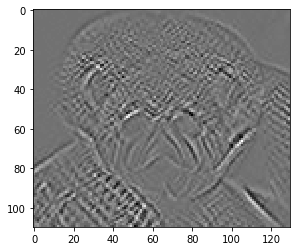

In [17]:
image_processing(snake_grayscale, edge_deteltion_kernel)

In [18]:
edge_deteltion_kernel = np.array([
    [1, 0, -1],
    [0, 0, 0,],
    [-1, 0, 1],
])

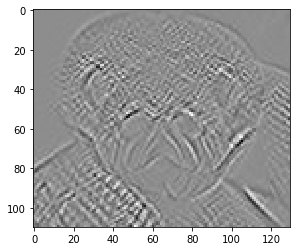

In [19]:
image_processing(snake_grayscale, edge_deteltion_kernel)

detect vertical edges

In [20]:
edge_detection_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

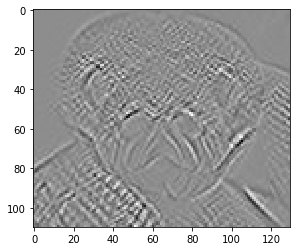

In [21]:
image_processing(snake_grayscale, edge_deteltion_kernel)

detect horizontal edges

In [22]:
edge_detection_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
])

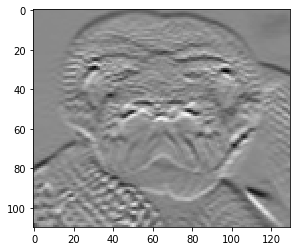

In [23]:
image_processing(snake_grayscale, edge_detection_kernel)

In [24]:
edge_deteltion_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1,],
    [0, 1, 0],
])

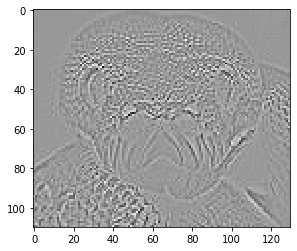

In [25]:
image_processing(snake_grayscale, edge_deteltion_kernel)

In [26]:
edge_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

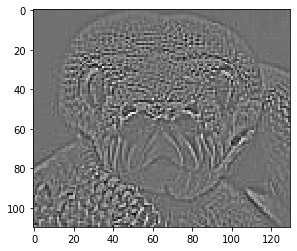

In [27]:
image_processing(snake_grayscale, edge_detection_kernel)

In [28]:
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

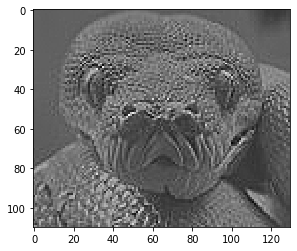

In [29]:
image_processing(snake_grayscale, sharpen_kernel)

box blur (normalized)

In [30]:
box_blur_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]) / 9

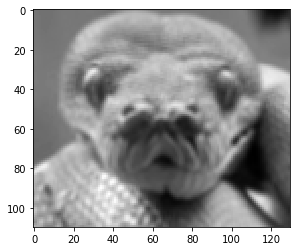

In [31]:
image_processing(snake_grayscale, box_blur_kernel)

In [32]:
gaussian_blur_3x3_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]) / 16

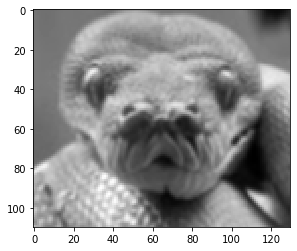

In [33]:
image_processing(snake_grayscale, gaussian_blur_3x3_kernel)

In [34]:
gaussian_blur_5x5_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1],
]) / 256

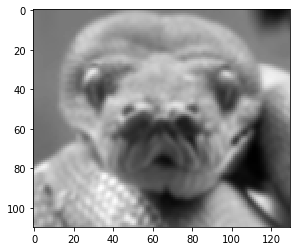

In [35]:
image_processing(snake_grayscale, gaussian_blur_5x5_kernel)

In [36]:
unsharp_masking_5x5_kernel = - np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1],
]) / 256

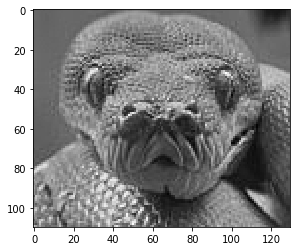

In [37]:
image_processing(snake_grayscale, unsharp_masking_5x5_kernel)

### Reference:
    - https://softuni.bg/trainings/2315/data-science-june-2019#lesson-11190
    - https://en.wikipedia.org/wiki/Kernel_(image_processing)
    - https://www.youtube.com/watch?v=C_zFhWdM4ic&list=PLzH6n4zXuckoRdljSlM2k35BufTYXNNeF&index=1